# Time Weighted Average (TWA) vs Event Weighed Average (EWA)

In [68]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import warnings
warnings.filterwarnings("ignore")

In [69]:

def random_date(start, end):
    """Generate a random datetime between `start` and `end`"""
    return start + timedelta(
        # Get a random amount of seconds between `start` and `end`
        seconds=random.randint(0, int((end - start).total_seconds())),
    )

In [70]:
# size
s = 10
# period of time
dti = datetime(2023,1,1,0,0)
dtf = datetime(2023,1,1,0,10)

### data samples preparation

In [71]:
# random sample
vs = [5,5,5]
dts = [dti,datetime(2023,1,1,0,5),dtf]
df00 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()
vs = [0,5,5]
dts = [dti,datetime(2023,1,1,0,5),dtf]
df01 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()
vs = [5,0,5]
dts = [dti,datetime(2023,1,1,0,5),dtf]
df02 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()
vs = [5,5,0]
dts = [dti,datetime(2023,1,1,0,5),dtf]
df03 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()

In [142]:
# random sample
vs = np.random.choice(10, s+2)
vs = np.ones(s+2) * 5
dts = [dti] + [random_date(dti, dtf) for i in range(s)] + [dtf]
df1 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()

In [143]:
# random sample in the begining
vs = np.random.choice(10, s+2)
vs = np.ones(s+2) * 5
dts = [dti] + [random_date(dti, dtf-timedelta(minutes=9.)) for i in range(s)] + [dtf]
df2 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()

In [144]:
# random sample in the end
vs = np.random.choice(10, s+2)
vs = np.ones(s+2) * 5
dts = [dti] + [random_date(dti+timedelta(minutes=9.), dtf) for i in range(s)] + [dtf]
df3 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()

In [145]:
def time_weighted_average(df:pd.DataFrame, colname:str, interval:str)->pd.DataFrame:
    assert isinstance(df.index, pd.DatetimeIndex)
    return df.resample(interval).apply(lambda x: (x[colname] * x.index.to_series().diff().dt.total_seconds()).sum() / x.index.to_series().diff().dt.total_seconds().sum())

In [146]:
print(time_weighted_average(df00, "v", interval = '10Min').dropna().values[0], np.mean(df00.v.values))
print(time_weighted_average(df01, "v", interval = '10Min').dropna().values[0], np.mean(df01.v.values))
print(time_weighted_average(df02, "v", interval = '10Min').dropna().values[0], np.mean(df02.v.values))
print(time_weighted_average(df03, "v", interval = '10Min').dropna().values[0], np.mean(df03.v.values))

5.0 5.0
5.0 3.3333333333333335
0.0 3.3333333333333335
5.0 3.3333333333333335


In [147]:
for i in range(10):
    vs = np.random.choice(10, s+2)
    dts = [dti] + [random_date(dti, dtf) for i in range(s)] + [dtf]
    df1 = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()
    print(time_weighted_average(df1, "v", interval = '10Min').dropna().values[0], np.mean(df1.v.values))

4.342105263157895 3.3333333333333335
5.4790619765494135 4.333333333333333
6.902597402597403 3.5833333333333335
6.2582322357019065 5.583333333333333
4.446771378708552 3.6666666666666665
3.781629116117851 4.916666666666667
3.6958174904942966 4.833333333333333
4.237668161434978 5.083333333333333
5.487352445193929 4.833333333333333
5.889748549323017 5.583333333333333


In [148]:
print(df2)
print(time_weighted_average(df2, "v", interval = '10Min').dropna().values[0], np.mean(df2.v.values))

                       v
dt                      
2023-01-01 00:00:00  5.0
2023-01-01 00:00:04  5.0
2023-01-01 00:00:07  5.0
2023-01-01 00:00:08  5.0
2023-01-01 00:00:22  5.0
2023-01-01 00:00:24  5.0
2023-01-01 00:00:29  5.0
2023-01-01 00:00:32  5.0
2023-01-01 00:00:34  5.0
2023-01-01 00:00:45  5.0
2023-01-01 00:00:57  5.0
2023-01-01 00:10:00  5.0
5.0 5.0


In [149]:
print(df3)
print(time_weighted_average(df3, "v", interval = '10Min').dropna().values[0], np.mean(df3.v.values))

                       v
dt                      
2023-01-01 00:00:00  5.0
2023-01-01 00:09:07  5.0
2023-01-01 00:09:09  5.0
2023-01-01 00:09:16  5.0
2023-01-01 00:09:16  5.0
2023-01-01 00:09:19  5.0
2023-01-01 00:09:21  5.0
2023-01-01 00:09:27  5.0
2023-01-01 00:09:32  5.0
2023-01-01 00:09:33  5.0
2023-01-01 00:09:36  5.0
2023-01-01 00:10:00  5.0
5.0 5.0


In [163]:
df = pd.DataFrame()
idti = datetime(2023,1,1,0,0)
for i in range(100):
    idtf = idti + timedelta(minutes=10)

    vs = np.random.choice(10, s+1)
    dts = [idti] + [random_date(idti, idtf) for i in range(s)]
    temp = pd.DataFrame({"dt":dts, "v":vs}).set_index("dt").sort_index()
    df = pd.concat([df, temp], axis = 0)
    idti = idti + timedelta(minutes=10)
df.tail()

,v
dt,
2023-01-01 16:35:00,6
2023-01-01 16:37:29,9
2023-01-01 16:37:34,1
2023-01-01 16:37:36,7
2023-01-01 16:39:52,7


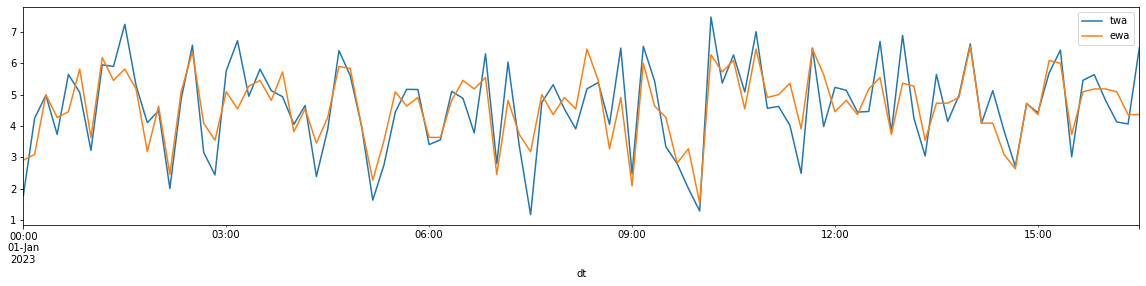

In [164]:
dfa1 = pd.DataFrame(time_weighted_average(df, "v", interval = '10Min'), columns = ["v"]).rename(columns = {"v":"twa"})
dfa2 = df.resample('10Min').mean().rename(columns = {"v":"ewa"})
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,4))
dfa1.plot(ax = ax)
dfa2.plot(ax = ax)
plt.show()


In [119]:
dfa = pd.concat([dfa1, dfa2], axis = 1)
dfa.describe()

,twa,ewa
count,500.000000,500.000000
mean,4.522399,4.573542
std,1.244442,0.869850
min,1.343685,2.090909
25%,3.590178,4.000000
50%,4.556588,4.636364
75%,5.434020,5.181818
max,7.701349,6.818182


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

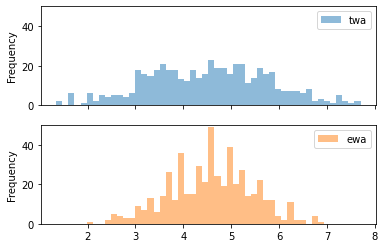

In [153]:
dfa.plot(kind = "hist", alpha = .5, bins = 50, subplots=True, ylim=(0,50))

In [160]:
np.mean(np.random.choice(11, 100000000))

4.99916659

In [188]:
l = [dti]
idtf = dti
for i in range(10000):
    idtf = idtf + timedelta(seconds=5)
    l.append(idtf)
    if dtf == idtf:
        break
dts = np.array(l)

In [189]:
df40 = pd.DataFrame({"dt":dts, "v":np.ones(len(dts))*5}).set_index("dt")
df41 = df40.head(10)
df42 = df40.tail(10)
print(time_weighted_average(df40, "v", interval = '10Min').dropna().values[0], np.mean(df40.v.values))
print(time_weighted_average(df41, "v", interval = '10Min').dropna().values[0], np.mean(df41.v.values))
print(time_weighted_average(df42, "v", interval = '10Min').dropna().values[0], np.mean(df42.v.values))

5.0 5.0
5.0 5.0
5.0 5.0


In [196]:
df40 = pd.DataFrame({"dt":dts, "v":np.random.choice(11, len(dts))}).set_index("dt")
df41 = df40.head(10)
df42 = df40.tail(10)
print(time_weighted_average(df40, "v", interval = '10Min').dropna().values[0], np.mean(df40.v.values))
print(time_weighted_average(df41, "v", interval = '10Min').dropna().values[0], np.mean(df41.v.values))
print(time_weighted_average(df42, "v", interval = '10Min').dropna().values[0], np.mean(df42.v.values))

4.630252100840337 4.669421487603306
3.7777777777777777 4.1
7.25 6.5


array([<AxesSubplot:xlabel='dt'>, <AxesSubplot:xlabel='dt'>,
       <AxesSubplot:xlabel='dt'>], dtype=object)

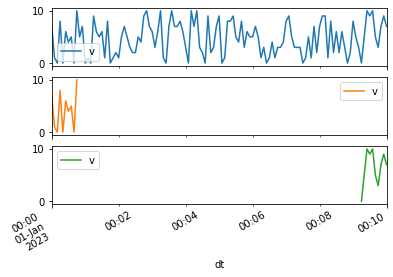

In [197]:
pd.concat([df40, df41, df42], axis = 1).plot(subplots=True)